# Predicted price of Microsoft for March 2024

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



C:\Users\abhis\Anaconda_3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1044/1044 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0292
Epoch 2/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7916e-04
Epoch 3/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.3656e-04
Epoch 4/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.8686e-04
Epoch 5/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.2618e-04
Epoch 6/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.0671e-04
Epoch 7/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.8551e-04
Epoch 8/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.8797e-04
Epoch 9/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7705e-04
Epoch 10/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.1923e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Mean Squared Error for March 2024 Predictions: 133.8527410904828


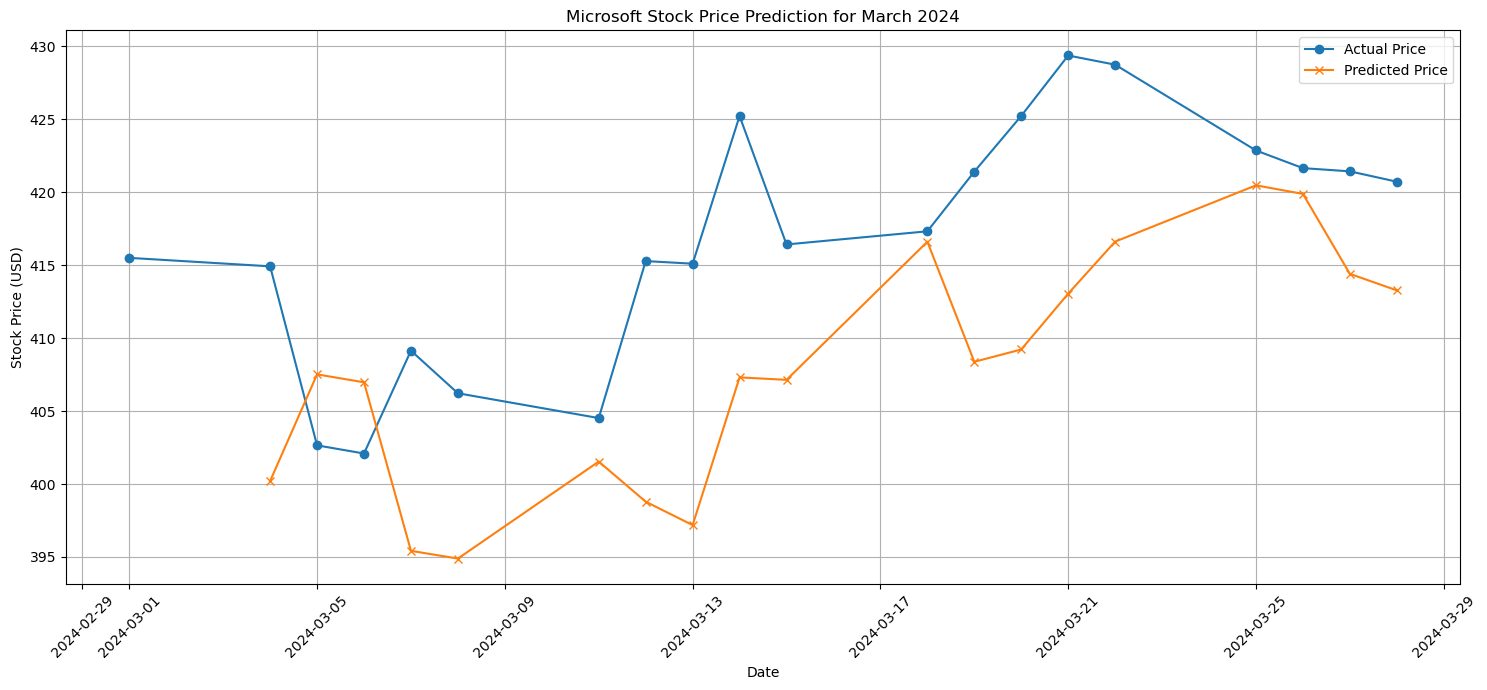

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

train_data = yf.download('MSFT', start='2020-01-01', end='2024-02-29')
train_data.index = pd.to_datetime(train_data.index)

test_data = yf.download('MSFT', start='2024-03-01', end='2024-03-31')
test_data.index = pd.to_datetime(test_data.index)

full_data = pd.concat([train_data['Close'], test_data['Close']])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_full_data = scaler.fit_transform(full_data.values.reshape(-1, 1))

def create_dataset(dataset, start_index, end_index, look_back=1):
    X, Y = [], []
    for i in range(start_index, end_index - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1 
train_size = len(train_data) - look_back
test_size = len(test_data)

trainX, trainY = create_dataset(scaled_full_data, 0, train_size, look_back)
testX, _ = create_dataset(scaled_full_data, train_size, train_size + test_size, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=1)  

test_predict = model.predict(testX)
test_predict = scaler.inverse_transform(test_predict)  

mse = mean_squared_error(test_data['Close'].values[look_back:], test_predict)
print(f'Mean Squared Error for March 2024 Predictions: {mse}')

plt.figure(figsize=(15, 7))
plt.plot(test_data.index, test_data['Close'].values, label='Actual Price', marker='o')
plt.plot(test_data.index[look_back:], test_predict, label='Predicted Price', marker='x')
plt.title('Microsoft Stock Price Prediction for March 2024')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate MAPE and convert it to an accuracy score

In [12]:
mape = mean_absolute_percentage_error(test_data['Close'].values[look_back:], test_predict)
accuracy = 100 - mape * 100

print(f'MAPE: {mape:.4f}')  
print(f'Accuracy: {accuracy:.2f}%') 

MAPE: 0.0240
Accuracy: 97.60%


# Predicted price of Microsoft for April 2024

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



C:\Users\abhis\Anaconda_3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1060/1060 - 5s - 5ms/step - loss: 0.0025
Epoch 2/10
1060/1060 - 2s - 2ms/step - loss: 0.0011
Epoch 3/10
1060/1060 - 2s - 2ms/step - loss: 9.7565e-04
Epoch 4/10
1060/1060 - 2s - 2ms/step - loss: 7.7397e-04
Epoch 5/10
1060/1060 - 2s - 2ms/step - loss: 8.1734e-04
Epoch 6/10
1060/1060 - 2s - 2ms/step - loss: 5.8782e-04
Epoch 7/10
1060/1060 - 3s - 2ms/step - loss: 5.4266e-04
Epoch 8/10
1060/1060 - 2s - 2ms/step - loss: 4.8355e-04
Epoch 9/10
1060/1060 - 2s - 2ms/step - loss: 4.6513e-04
Epoch 10/10
1060/1060 - 2s - 2ms/step - loss: 4.5682e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Mean Squared Error for available days in April 2024: 26.307885748520494


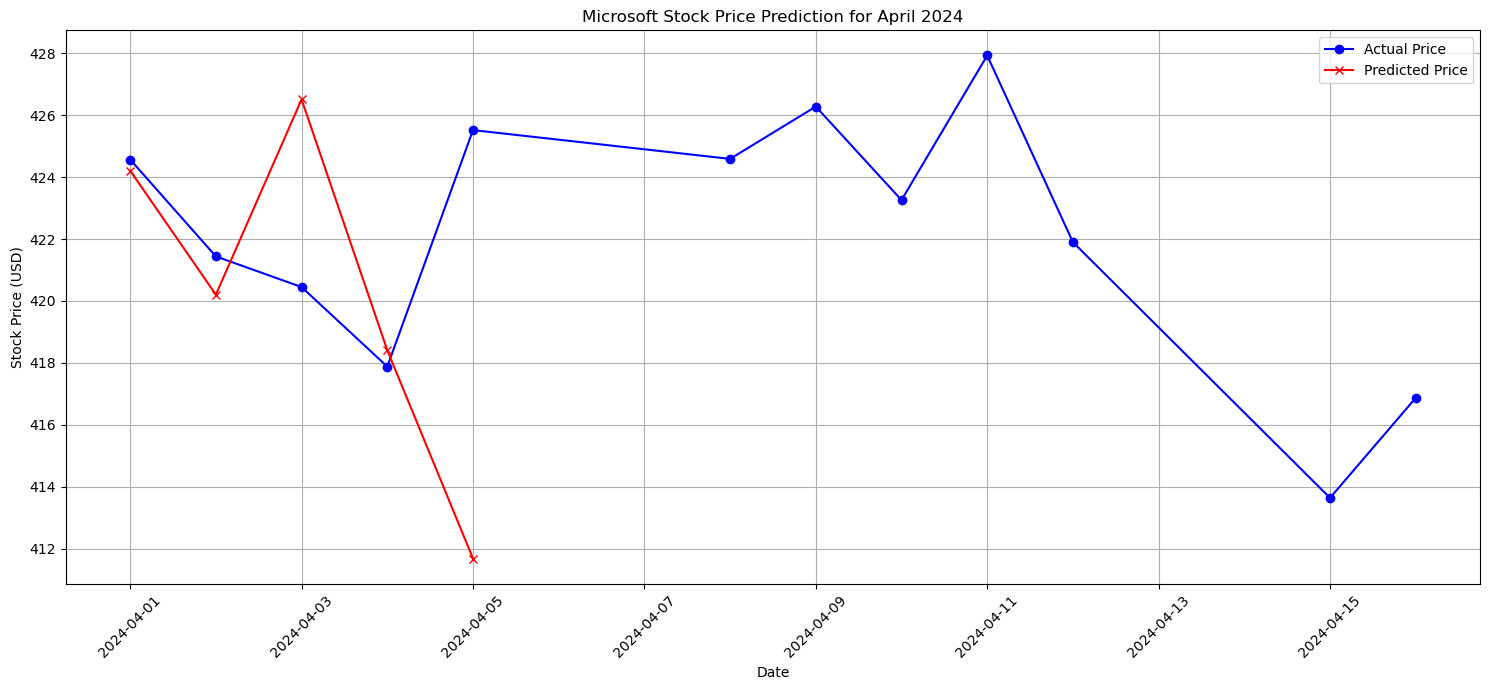

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

today = pd.Timestamp.today()

train_data = yf.download('MSFT', start='2020-01-01', end='2024-03-31')
train_data.index = pd.to_datetime(train_data.index)

test_data = yf.download('MSFT', start='2024-04-01', end='2024-04-30')
test_data.index = pd.to_datetime(test_data.index)

full_data = pd.concat([train_data['Close'], test_data['Close']])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_full_data = scaler.fit_transform(full_data.values.reshape(-1, 1))

look_back = 7
def create_dataset(dataset, start_index, end_index):
    X, Y = [], []
    for i in range(start_index, end_index - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

trainX, trainY = create_dataset(scaled_full_data, 0, len(train_data))
testX, _ = create_dataset(scaled_full_data, len(train_data), len(full_data))

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

test_predict = model.predict(testX)
test_predict = scaler.inverse_transform(test_predict) 

last_available_date = min(test_data.index[-1], today)
mse = mean_squared_error(test_data.loc[:last_available_date, 'Close'].values[look_back:], test_predict[:len(test_data.loc[:last_available_date])])
print(f'Mean Squared Error for available days in April 2024: {mse}')

plt.figure(figsize=(15, 7))
plt.plot(test_data.index, test_data['Close'].values, label='Actual Price', marker='o', color='blue')
plt.plot(test_data.index[:len(test_predict)], test_predict, label='Predicted Price', marker='x', color='red')
plt.title('Microsoft Stock Price Prediction for April 2024')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate MAPE and convert it to an accuracy score

In [14]:
mape = mean_absolute_percentage_error(test_data['Close'].values[look_back:], test_predict)
accuracy = 100 - mape * 100

print(f'MAPE: {mape:.4f}')  
print(f'Accuracy: {accuracy:.2f}%') 


MAPE: 0.0110
Accuracy: 98.90%


# Predicted price of Apple for March 2024

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



C:\Users\abhis\Anaconda_3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0715
Epoch 2/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.0420e-04
Epoch 3/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5641e-04
Epoch 4/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.2632e-04
Epoch 5/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.0340e-04
Epoch 6/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.2985e-04
Epoch 7/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.2575e-04
Epoch 8/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5808e-04
Epoch 9/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.2569e-04
Epoch 10/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.4530e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Mean Squared Error for March 2024 Predictions: 16.356174654915538


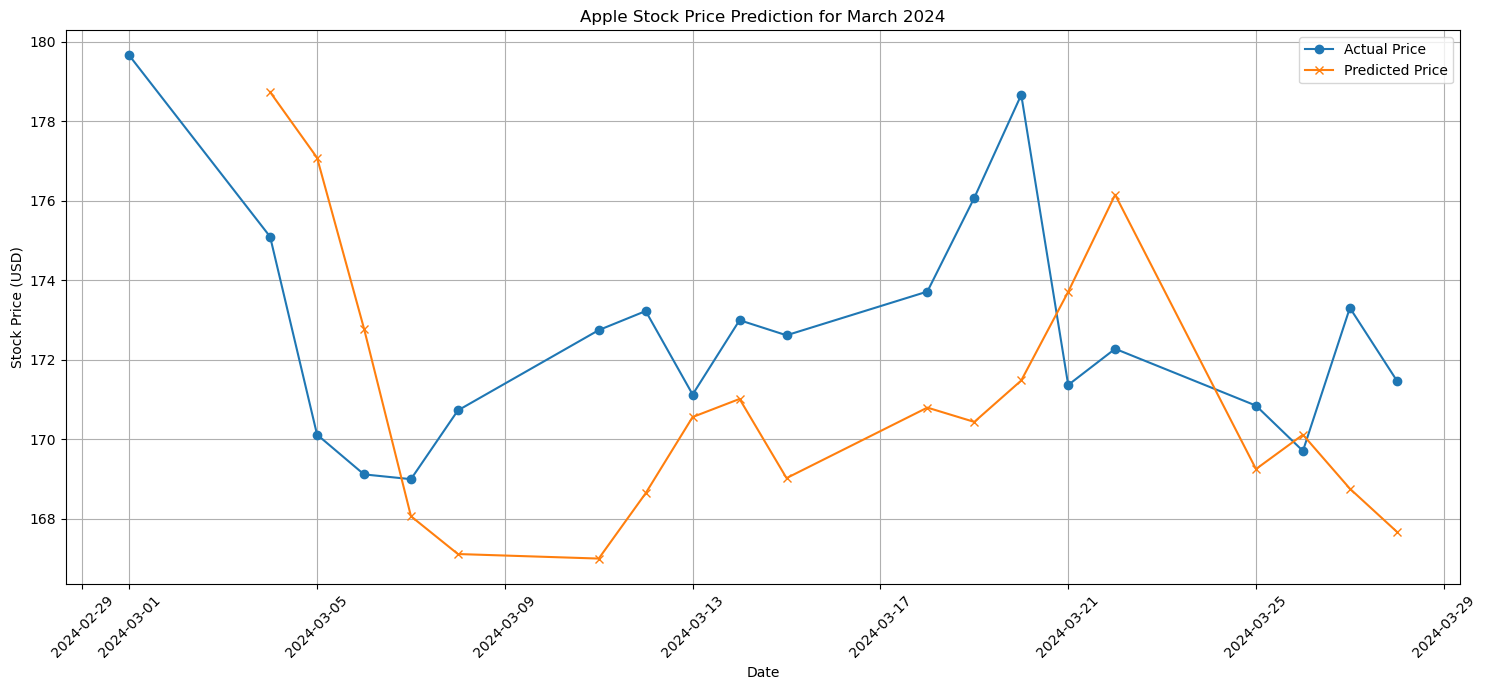

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

train_data = yf.download('AAPL', start='2020-01-01', end='2024-02-29')
train_data.index = pd.to_datetime(train_data.index)

test_data = yf.download('AAPL', start='2024-03-01', end='2024-03-31')
test_data.index = pd.to_datetime(test_data.index)

full_data = pd.concat([train_data['Close'], test_data['Close']])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_full_data = scaler.fit_transform(full_data.values.reshape(-1, 1))

def create_dataset(dataset, start_index, end_index, look_back=1):
    X, Y = [], []
    for i in range(start_index, end_index - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1 
train_size = len(train_data) - look_back
test_size = len(test_data)

trainX, trainY = create_dataset(scaled_full_data, 0, train_size, look_back)
testX, _ = create_dataset(scaled_full_data, train_size, train_size + test_size, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=1)  

test_predict = model.predict(testX)
test_predict = scaler.inverse_transform(test_predict)  # Inverse scaling to get actual prices

mse = mean_squared_error(test_data['Close'].values[look_back:], test_predict)
print(f'Mean Squared Error for March 2024 Predictions: {mse}')

plt.figure(figsize=(15, 7))
plt.plot(test_data.index, test_data['Close'].values, label='Actual Price', marker='o')
plt.plot(test_data.index[look_back:], test_predict, label='Predicted Price', marker='x')
plt.title('Apple Stock Price Prediction for March 2024')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate MAPE and convert it to an accuracy score

In [18]:
mape = mean_absolute_percentage_error(test_data['Close'].values[look_back:], test_predict)
accuracy = 100 - mape * 100

print(f'MAPE: {mape:.4f}') 
print(f'Accuracy: {accuracy:.2f}%')  

MAPE: 0.0206
Accuracy: 97.94%


# Predicted price of Apple for April 2024

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\abhis\Anaconda_3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1060/1060 - 5s - 5ms/step - loss: 0.0064
Epoch 2/10
1060/1060 - 2s - 2ms/step - loss: 0.0017
Epoch 3/10
1060/1060 - 2s - 2ms/step - loss: 0.0015
Epoch 4/10
1060/1060 - 2s - 2ms/step - loss: 0.0013
Epoch 5/10
1060/1060 - 2s - 2ms/step - loss: 0.0011
Epoch 6/10
1060/1060 - 2s - 2ms/step - loss: 8.4592e-04
Epoch 7/10
1060/1060 - 2s - 2ms/step - loss: 7.0667e-04
Epoch 8/10
1060/1060 - 2s - 2ms/step - loss: 6.4902e-04
Epoch 9/10
1060/1060 - 2s - 2ms/step - loss: 5.5549e-04
Epoch 10/10
1060/1060 - 2s - 2ms/step - loss: 5.7277e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Mean Squared Error for available days in April 2024: 15.58074039267376


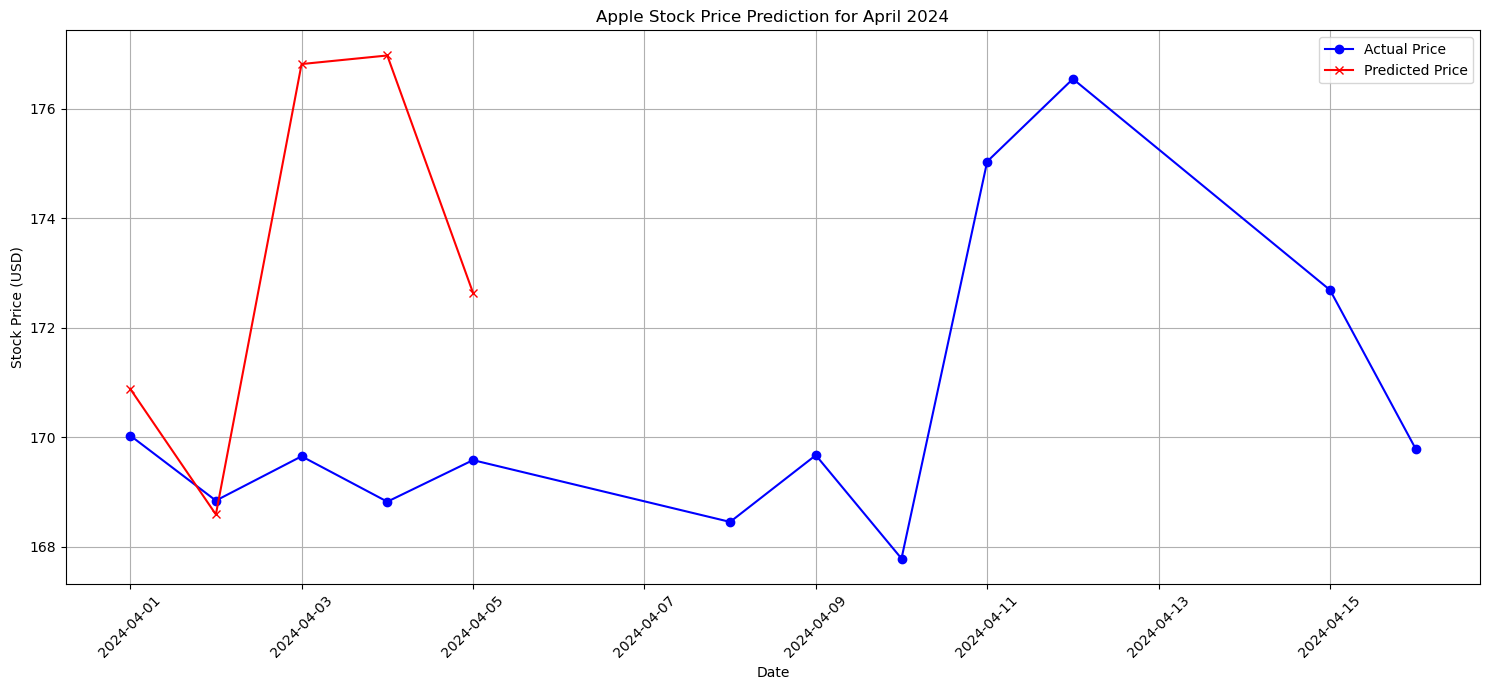

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

today = pd.Timestamp.today()

train_data = yf.download('AAPL', start='2020-01-01', end='2024-03-31')
train_data.index = pd.to_datetime(train_data.index)

test_data = yf.download('AAPL', start='2024-04-01', end='2024-04-30')
test_data.index = pd.to_datetime(test_data.index)

full_data = pd.concat([train_data['Close'], test_data['Close']])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_full_data = scaler.fit_transform(full_data.values.reshape(-1, 1))

look_back = 7
def create_dataset(dataset, start_index, end_index):
    X, Y = [], []
    for i in range(start_index, end_index - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

trainX, trainY = create_dataset(scaled_full_data, 0, len(train_data))
testX, _ = create_dataset(scaled_full_data, len(train_data), len(full_data))

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

test_predict = model.predict(testX)
test_predict = scaler.inverse_transform(test_predict) 

last_available_date = min(test_data.index[-1], today)
mse = mean_squared_error(test_data.loc[:last_available_date, 'Close'].values[look_back:], test_predict[:len(test_data.loc[:last_available_date])])
print(f'Mean Squared Error for available days in April 2024: {mse}')

plt.figure(figsize=(15, 7))
plt.plot(test_data.index, test_data['Close'].values, label='Actual Price', marker='o', color='blue')
plt.plot(test_data.index[:len(test_predict)], test_predict, label='Predicted Price', marker='x', color='red')
plt.title('Apple Stock Price Prediction for April 2024')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate MAPE and convert it to an accuracy score

In [20]:
mape = mean_absolute_percentage_error(test_data['Close'].values[look_back:], test_predict)
accuracy = 100 - mape * 100

print(f'MAPE: {mape:.4f}')  
print(f'Accuracy: {accuracy:.2f}%') 

MAPE: 0.0197
Accuracy: 98.03%


# Predicted price of Google for March 2024

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



C:\Users\abhis\Anaconda_3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1044/1044 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0540
Epoch 2/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.5866e-04
Epoch 3/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.1246e-04
Epoch 4/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6.4498e-04
Epoch 5/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.2479e-04
Epoch 6/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6438e-04
Epoch 7/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7785e-04
Epoch 8/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.4176e-04
Epoch 9/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.2540e-04
Epoch 10/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.8725e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Mean Squared Error for March 2024 Predictions: 7.322457235465807


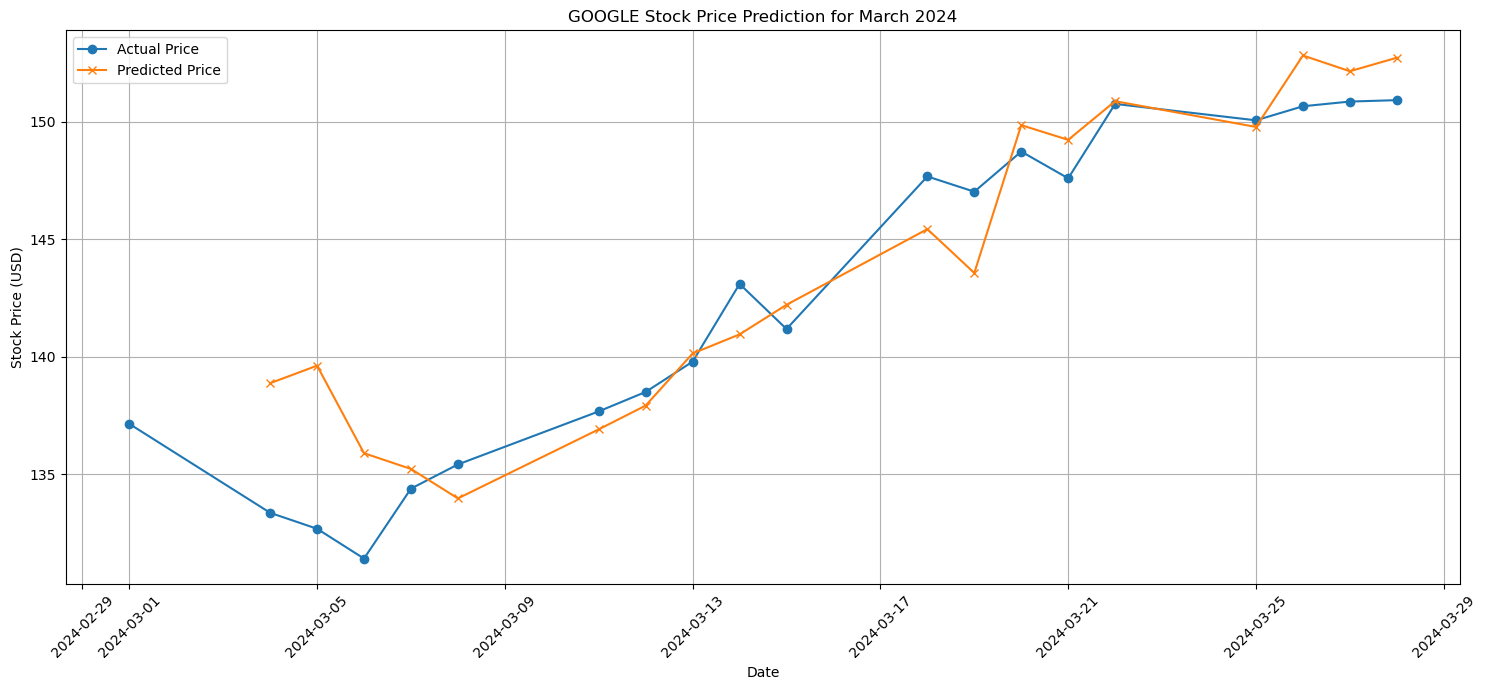

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

train_data = yf.download('GOOGL', start='2020-01-01', end='2024-02-29')
train_data.index = pd.to_datetime(train_data.index)

test_data = yf.download('GOOGL', start='2024-03-01', end='2024-03-31')
test_data.index = pd.to_datetime(test_data.index)

full_data = pd.concat([train_data['Close'], test_data['Close']])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_full_data = scaler.fit_transform(full_data.values.reshape(-1, 1))

def create_dataset(dataset, start_index, end_index, look_back=1):
    X, Y = [], []
    for i in range(start_index, end_index - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1 
train_size = len(train_data) - look_back
test_size = len(test_data)

trainX, trainY = create_dataset(scaled_full_data, 0, train_size, look_back)
testX, _ = create_dataset(scaled_full_data, train_size, train_size + test_size, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=1)  
# Predictions
test_predict = model.predict(testX)
test_predict = scaler.inverse_transform(test_predict)  

mse = mean_squared_error(test_data['Close'].values[look_back:], test_predict)
print(f'Mean Squared Error for March 2024 Predictions: {mse}')

plt.figure(figsize=(15, 7))
plt.plot(test_data.index, test_data['Close'].values, label='Actual Price', marker='o')
plt.plot(test_data.index[look_back:], test_predict, label='Predicted Price', marker='x')
plt.title('GOOGLE Stock Price Prediction for March 2024')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate MAPE and convert it to an accuracy score

In [22]:
mape = mean_absolute_percentage_error(test_data['Close'].values[look_back:], test_predict)
accuracy = 100 - mape * 100

print(f'MAPE: {mape:.4f}')  
print(f'Accuracy: {accuracy:.2f}%') 


MAPE: 0.0144
Accuracy: 98.56%


# Predicted price of Google for April 2024

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



C:\Users\abhis\Anaconda_3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1060/1060 - 5s - 5ms/step - loss: 0.0048
Epoch 2/10
1060/1060 - 2s - 2ms/step - loss: 0.0020
Epoch 3/10
1060/1060 - 2s - 2ms/step - loss: 0.0017
Epoch 4/10
1060/1060 - 2s - 2ms/step - loss: 0.0014
Epoch 5/10
1060/1060 - 2s - 2ms/step - loss: 0.0012
Epoch 6/10
1060/1060 - 2s - 2ms/step - loss: 8.9786e-04
Epoch 7/10
1060/1060 - 2s - 2ms/step - loss: 7.7873e-04
Epoch 8/10
1060/1060 - 2s - 2ms/step - loss: 7.2919e-04
Epoch 9/10
1060/1060 - 2s - 2ms/step - loss: 7.2481e-04
Epoch 10/10
1060/1060 - 2s - 2ms/step - loss: 6.6424e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
Mean Squared Error for available days in April 2024: 9.671921368315816


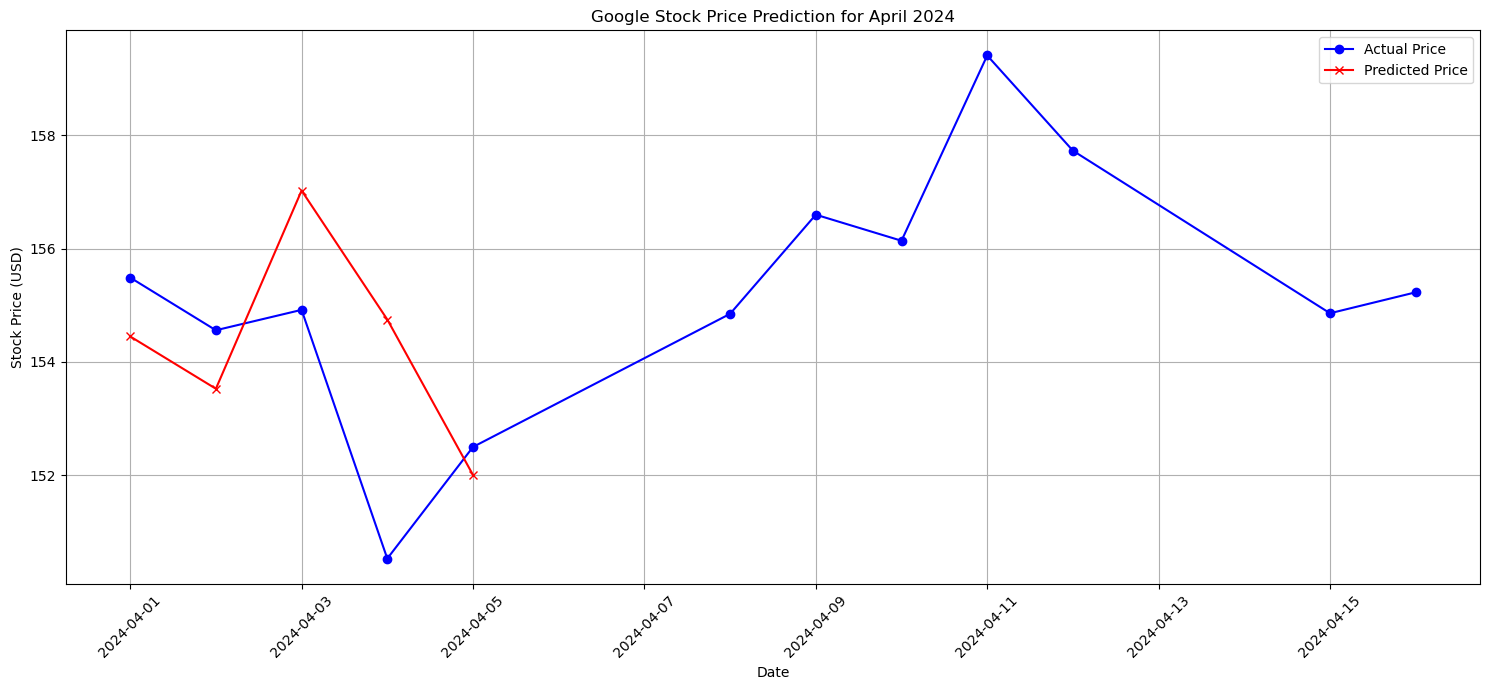

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

today = pd.Timestamp.today()

train_data = yf.download('GOOGL', start='2020-01-01', end='2024-03-31')
train_data.index = pd.to_datetime(train_data.index)

test_data = yf.download('GOOGL', start='2024-04-01', end='2024-04-30')
test_data.index = pd.to_datetime(test_data.index)

full_data = pd.concat([train_data['Close'], test_data['Close']])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_full_data = scaler.fit_transform(full_data.values.reshape(-1, 1))

look_back = 7
def create_dataset(dataset, start_index, end_index):
    X, Y = [], []
    for i in range(start_index, end_index - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

trainX, trainY = create_dataset(scaled_full_data, 0, len(train_data))
testX, _ = create_dataset(scaled_full_data, len(train_data), len(full_data))

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

test_predict = model.predict(testX)
test_predict = scaler.inverse_transform(test_predict)  

last_available_date = min(test_data.index[-1], today)
mse = mean_squared_error(test_data.loc[:last_available_date, 'Close'].values[look_back:], test_predict[:len(test_data.loc[:last_available_date])])
print(f'Mean Squared Error for available days in April 2024: {mse}')

plt.figure(figsize=(15, 7))
plt.plot(test_data.index, test_data['Close'].values, label='Actual Price', marker='o', color='blue')
plt.plot(test_data.index[:len(test_predict)], test_predict, label='Predicted Price', marker='x', color='red')
plt.title('Google Stock Price Prediction for April 2024')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate MAPE and convert it to an accuracy score

In [24]:
mape = mean_absolute_percentage_error(test_data['Close'].values[look_back:], test_predict)
accuracy = 100 - mape * 100

print(f'MAPE: {mape:.4f}') 
print(f'Accuracy: {accuracy:.2f}%')  

MAPE: 0.0147
Accuracy: 98.53%
